In [105]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import math

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

# Read in the data

df = pd.read_csv(r'C:\Users\User\Desktop\Data Analysis\Movies Data - Python\movies.csv')

In [150]:
# Take a look at the whole data

pd.set_option('display.max_rows', None)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8000,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4000,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8000,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8000,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4000,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [107]:
# I see there are some missing values, so I want to calculate the percentage of missing values for each column.
# I will loop through the columns, collect isnull() for each entry
# and calculate np.mean() for set of these boolean values in each column

for col in df.columns:
    missing_percentage = (np.mean(df[col].isnull()))*100
    print('{} - {}%'.format(col, missing_percentage))
    


name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [108]:
# Take a look at Data Types

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB
None


In [109]:
# I want to convert votes, budget, gross and runtime to integer
# But before I have to replace NaN values with numeric 0

df['budget'].fillna(0, inplace = True)

df['gross'].fillna(0, inplace = True)

df['votes'].fillna(0, inplace = True)

df['runtime'].fillna(0, inplace = True)

# Now I can convert columns to int64

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')

df['runtime'] = df['runtime'].astype('int64')

# Actually, now I realize that 0 whithin budget, revenue, votes and runtime don't make sense
# and it can have negative impact on my analysis.
# So I decide to get rid of these values at all.
# I still will have about 75% of data, which seems enough, especially given the fact that this is a protfolio project
# whose purpose is to demonstrate my ability to use different techniques.

df = df[df['budget'] != 0]

df = df[df['gross'] != 0]

df = df[df['votes'] != 0]

df = df[df['runtime'] != 0]

In [110]:
# Take a look at remaining data

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5435 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5435 non-null   object 
 1   rating    5423 non-null   object 
 2   genre     5435 non-null   object 
 3   year      5435 non-null   int64  
 4   released  5435 non-null   object 
 5   score     5435 non-null   float64
 6   votes     5435 non-null   int64  
 7   director  5435 non-null   object 
 8   writer    5435 non-null   object 
 9   star      5435 non-null   object 
 10  country   5434 non-null   object 
 11  budget    5435 non-null   int64  
 12  gross     5435 non-null   int64  
 13  company   5433 non-null   object 
 14  runtime   5435 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 679.4+ KB
None


In [111]:
# I have noticed that 'year' column does not always match with the year in 'released' column.
# Let's create new column 'correct_year' and populate it with the year extracted from 'released'
# Let's extract the year from 'released'

# df['released'].str.extract(pat = '([0-9]{4})')

# And create new column and populate it with extracted values converted to int64

df['correct_year'] = df['released'].str.extract(pat = '([0-9]{4})').astype('int64')

In [147]:
# Order data by the gross

df.sort_values(by=['gross'], inplace = True, ascending = False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8000,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4000,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8000,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8000,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4000,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [114]:
# Let's drop duplicates
print('Number of rows before dropping duplicates:', str(len(df)))
df.drop_duplicates()
print('Number of rows after dropping duplicates:', str(len(df)))
# It turns out there were no duplicates

Number of rows before dropping duplicates: 5435
Number of rows after dropping duplicates: 5435


In [115]:
# Let's generate statistics on numeric columns to explore the data and, probably, to use it for further cleaning

pd.options.display.float_format = '{:.4f}'.format # Suppress scientific notation

print('Mean values:')
print(df[['correct_year', 'score', 'votes', 'budget', 'gross', 'runtime']].mean())

print('\nMinimum values:')
print(df[['correct_year', 'score', 'votes', 'budget', 'gross', 'runtime']].min())

print('\nMaximum values:')
print(df[['correct_year', 'score', 'votes', 'budget', 'gross', 'runtime']].max())

Mean values:
correct_year        2001.8057
score                  6.3928
votes             114924.6427
budget          35937890.3623
gross          103016402.9816
runtime              108.1564
dtype: float64

Minimum values:
correct_year   1980.0000
score             1.9000
votes           195.0000
budget         6000.0000
gross           309.0000
runtime          63.0000
dtype: float64

Maximum values:
correct_year         2020.0000
score                   9.3000
votes             2400000.0000
budget          356000000.0000
gross          2847246203.0000
runtime               271.0000
dtype: float64


In [89]:
# Let's look at unique values of string columns

print('genre')
print(np.sort(pd.unique(df['genre'])))
print('\nrating')
print(np.sort(pd.unique(df['rating']).astype(str)))
print('\ndirector')
print(np.sort(pd.unique(df['director'])))
print('\nwriter')
print(np.sort(pd.unique(df['writer'])))
print('\ncountry')
print(np.sort(pd.unique(df['country']).astype(str)))
print('\ncompany')
print(pd.unique(df['company']))

genre
['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Horror' 'Mystery' 'Romance' 'Sci-Fi' 'Thriller'
 'Western']

rating
['Approved' 'G' 'NC-17' 'Not Rated' 'PG' 'PG-13' 'R' 'TV-MA' 'Unrated' 'X'
 'nan']

director
['Aaron Blaise' 'Aaron Norris' 'Aaron Seltzer' ... 'Zelda Barron'
 'Zoran Perisic' 'Élie Chouraqui']

writer
["'Weird Al' Yankovic" 'A L Katz' 'A.A. Milne' ... 'Àlex Pastor'
 'Émile Gaudreault' 'Émile Zola']

country
['Argentina' 'Aruba' 'Australia' 'Austria' 'Belgium' 'Brazil' 'Canada'
 'Chile' 'China' 'Colombia' 'Czech Republic' 'Denmark'
 'Federal Republic of Yugoslavia' 'Finland' 'France' 'Germany' 'Hong Kong'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kenya' 'Lebanon' 'Malta' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Panama' 'Portugal' 'Republic of Macedonia'
 'Russia' 'South Africa' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'Taiwan' 'Thailand' 'United Arab Emirates

In [116]:
# 'Not Rated' and 'Unrated' represent the same, so let's unify it. And let's replace NaN with 'Unrated'

df.loc[df['rating'].astype(str).str.contains('Not Rated'), 'rating'] = 'Unrated'
df['rating'].fillna('Unrated', inplace = True)
print('rating')
print(np.sort(pd.unique(df['rating']).astype(str)))

rating
['Approved' 'G' 'NC-17' 'PG' 'PG-13' 'R' 'TV-MA' 'Unrated' 'X']


In [117]:
# Now data is clean, let's start data analysis

# I want to count number of values

# By country (top 15)
print('Count by country:')
print(df['country'].value_counts()[:15])

# Look at top 10 most productive directors
print('\nMost productive directors:')
print(df['director'].value_counts()[:10])

# Look at top 10 most productive writers
print('\nMost productive writers:')
print(df['writer'].value_counts()[:10])

# Count by rating
print('\nCount by rating:')
print(df['rating'].value_counts())

# Count by genre
print('\nCount by genre:')
print(df['genre'].value_counts())


Count by country:
United States     4325
United Kingdom     494
Canada             111
France             105
Germany             82
Australia           42
Japan               31
China               26
Hong Kong           25
Ireland             21
Italy               19
Spain               18
New Zealand         18
South Korea         13
Mexico              12
Name: country, dtype: int64

Most productive directors:
Woody Allen          33
Clint Eastwood       31
Steven Spielberg     27
Ron Howard           23
Ridley Scott         23
Steven Soderbergh    23
Joel Schumacher      20
Tim Burton           19
Martin Scorsese      19
Barry Levinson       18
Name: director, dtype: int64

Most productive writers:
Woody Allen           32
Stephen King          29
John Hughes           20
Luc Besson            14
Joel Coen             13
Wes Craven            12
David Mamet           11
Quentin Tarantino     11
M. Night Shyamalan    11
Robert Rodriguez      11
Name: writer, dtype: int64

Count by

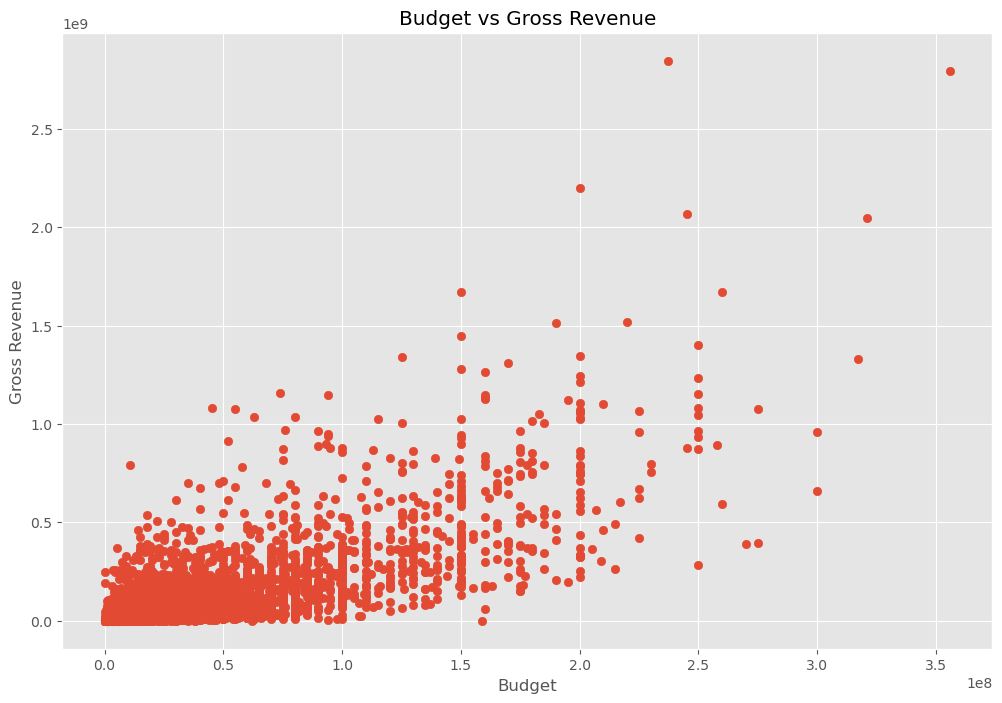

In [122]:
#  Now let's check for correlations.
#  Hypothesis:
# 1) gross will have high correlation with budget
# 2) score will have high correlation with gross

# Let's first visualize data and build scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Revenue')
plt.xlabel("Budget")
plt.ylabel("Gross Revenue")

plt.show()

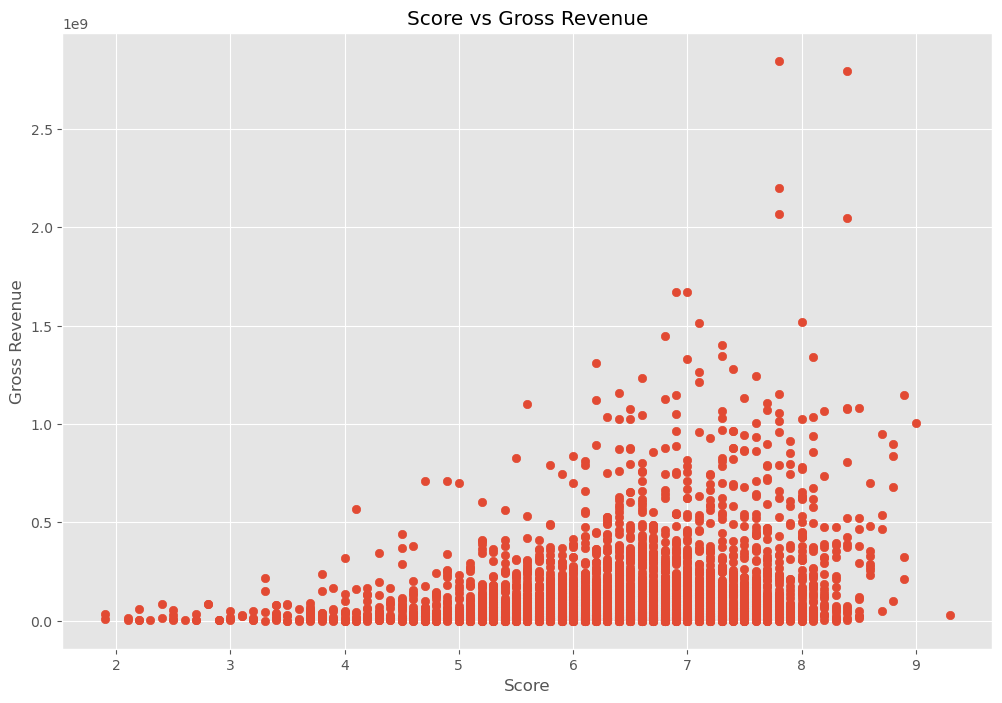

In [120]:
# Scatter plot with gross vs score

plt.scatter(x=df['score'], y=df['gross'])

plt.title('Score vs Gross Revenue')
plt.xlabel("Score")
plt.ylabel("Gross Revenue")

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

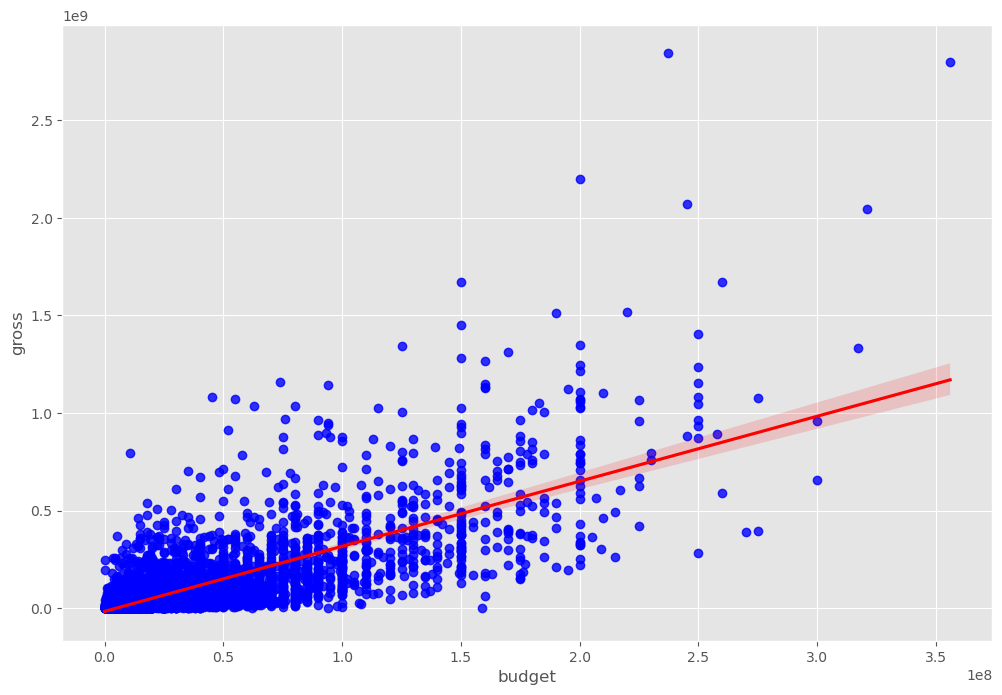

In [121]:
#  Now I want to plot budget vs gross and gross vs score using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color':'blue'}, line_kws = {'color':'red'})

<AxesSubplot:xlabel='score', ylabel='gross'>

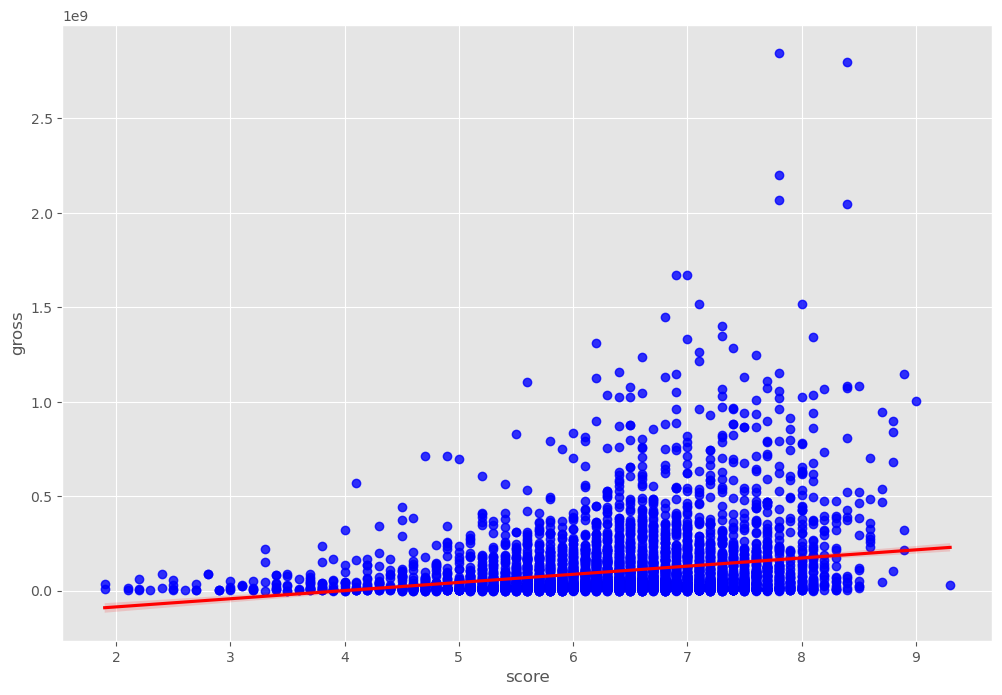

In [123]:
sns.regplot(x = 'score', y = 'gross', data = df, scatter_kws = {'color':'blue'}, line_kws = {'color':'red'})

In [124]:
# Now let's start looking at correlation using corr() method

df.corr(method = 'pearson') # this is standard correlation coefficient, besides there are kendall and spearman

,year,score,votes,budget,gross,runtime,correct_year
year,1.0000,0.0554,0.2059,0.3278,0.2744,0.0742,0.9986
score,0.0554,1.0000,0.4738,0.0718,0.2221,0.4146,0.0612
votes,0.2059,0.4738,1.0000,0.4400,0.6149,0.3524,0.2030
budget,0.3278,0.0718,0.4400,1.0000,0.7404,0.3186,0.3203
gross,0.2744,0.2221,0.6149,0.7404,1.0000,0.2756,0.2687
runtime,0.0742,0.4146,0.3524,0.3186,0.2756,1.0000,0.0744
correct_year,0.9986,0.0612,0.2030,0.3203,0.2687,0.0744,1.0000


In [125]:
df.corr(method = 'kendall')

,year,score,votes,budget,gross,runtime,correct_year
year,1.0000,0.0386,0.2960,0.2209,0.2393,0.0641,0.9911
score,0.0386,1.0000,0.3501,-0.0064,0.1247,0.2929,0.0428
votes,0.2960,0.3501,1.0000,0.3463,0.5536,0.2056,0.2927
budget,0.2209,-0.0064,0.3463,1.0000,0.5127,0.2309,0.2136
gross,0.2393,0.1247,0.5536,0.5127,1.0000,0.1768,0.2322
runtime,0.0641,0.2929,0.2056,0.2309,0.1768,1.0000,0.0641
correct_year,0.9911,0.0428,0.2927,0.2136,0.2322,0.0641,1.0000


In [126]:
df.corr(method = 'spearman')

,year,score,votes,budget,gross,runtime,correct_year
year,1.0000,0.0565,0.4267,0.3131,0.3507,0.0944,0.9986
score,0.0565,1.0000,0.4954,-0.0100,0.1829,0.4130,0.0628
votes,0.4267,0.4954,1.0000,0.4935,0.7458,0.3010,0.4223
budget,0.3131,-0.0100,0.4935,1.0000,0.6937,0.3303,0.3025
gross,0.3507,0.1829,0.7458,0.6937,1.0000,0.2571,0.3402
runtime,0.0944,0.4130,0.3010,0.3303,0.2571,1.0000,0.0945
correct_year,0.9986,0.0628,0.4223,0.3025,0.3402,0.0945,1.0000


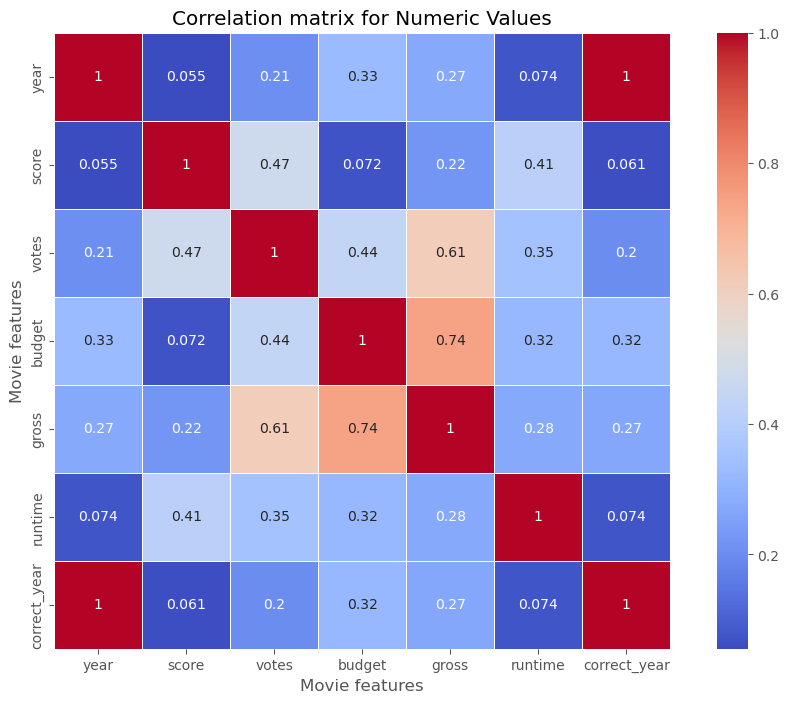

In [133]:
# Turns out that  hypothesis#1 was quite accurate: gross vs budget - high corr
# while hypothesis#2 was completely wrong: score is not correlated with gross
# It also turns out that votes has high correlation with gross, which is undestandable:
# the higer total votes count -> the higher audience -> the higher gross

# Let's now visualize correlation matrix using seaborn.heatmap

corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True, linewidths = 0.5, square = True)

plt.title("Correlation matrix for Numeric Values")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()



In [148]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8000,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4000,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8000,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8000,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4000,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [149]:
# corr() method ignores not-numeric columns
# But I want to calculate correlations for string values too.
# To be able to do this, I will assign a random numeric value for each unique categorical value

df_numerized = df.copy(deep = True)

for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,387,4,0,2009,528,7.8000,1100000,787,1265,1538,47,237000000,2847246203,1388,162,2009
7445,389,4,0,2019,138,8.4000,903000,106,515,1474,47,356000000,2797501328,987,181,2019
3045,4922,4,6,1997,535,7.8000,1100000,787,1265,1076,47,200000000,2201647264,1388,194,1997
6663,3655,4,0,2015,530,7.8000,876000,770,1810,357,47,245000000,2069521700,949,138,2015
7244,390,4,0,2018,146,8.4000,897000,106,515,1474,47,321000000,2048359754,987,149,2018


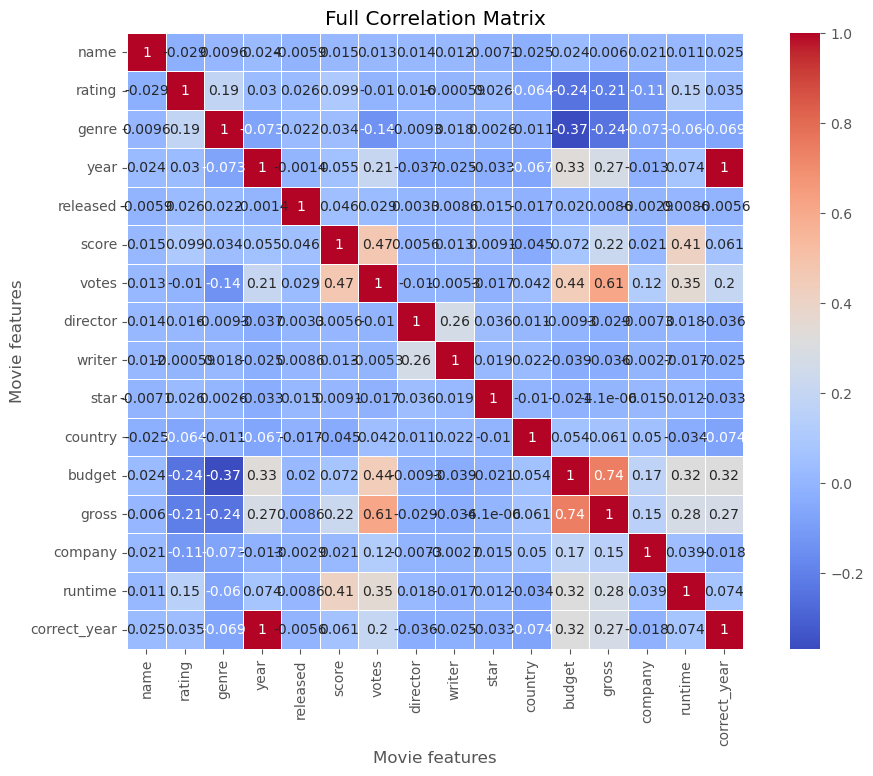

In [136]:
# Now I can build visualize correlations for all data in the Data Frame

full_corr_matrix = df_numerized.corr()
sns.heatmap(full_corr_matrix, cmap = 'coolwarm', annot = True, linewidths = 0.5, square = True)

plt.title("Full Correlation Matrix")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [137]:
# Actually I don't see any good correlations despite other than budget-gross and votes-gross
# But for demonstrational purposes I want to organize this correlation data:
# First let's use unstack() method to see correlatioan for each column:

corr_pairs = full_corr_matrix.unstack()

corr_pairs

name          name            1.0000
              rating         -0.0286
              genre           0.0096
              year            0.0244
              released       -0.0059
              score           0.0150
              votes           0.0129
              director        0.0137
              writer          0.0116
              star           -0.0071
              country        -0.0246
              budget          0.0237
              gross           0.0060
              company         0.0212
              runtime         0.0108
              correct_year    0.0247
rating        name           -0.0286
              rating          1.0000
              genre           0.1862
              year            0.0301
              released        0.0261
              score           0.0995
              votes          -0.0104
              director        0.0156
              writer         -0.0006
              star            0.0262
              country        -0.0645
 

In [140]:
# I can sort these pairs for convinience
sorted_pairs = corr_pairs.sort_values(ascending = False)

sorted_pairs

name          name            1.0000
rating        rating          1.0000
runtime       runtime         1.0000
company       company         1.0000
gross         gross           1.0000
budget        budget          1.0000
country       country         1.0000
star          star            1.0000
writer        writer          1.0000
director      director        1.0000
votes         votes           1.0000
score         score           1.0000
released      released        1.0000
year          year            1.0000
genre         genre           1.0000
correct_year  correct_year    1.0000
              year            0.9986
year          correct_year    0.9986
gross         budget          0.7404
budget        gross           0.7404
votes         gross           0.6149
gross         votes           0.6149
score         votes           0.4738
votes         score           0.4738
              budget          0.4400
budget        votes           0.4400
runtime       score           0.4146
s

In [143]:
# Now I can take a look only at strong pairs, abs(corr)>0.5

strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.5) & (abs(sorted_pairs) < 1)]

strong_pairs

correct_year  year           0.9986
year          correct_year   0.9986
gross         budget         0.7404
budget        gross          0.7404
votes         gross          0.6149
gross         votes          0.6149
dtype: float64

In [146]:
# Finally I want take a look at top companies by total gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted

,gross
company,
Warner Bros.,54773202654
Universal Pictures,51241105418
Columbia Pictures,42356430218
Paramount Pictures,40021704691
Twentieth Century Fox,39542573303
Walt Disney Pictures,35833650748
New Line Cinema,19628786232
Marvel Studios,15065592411
DreamWorks Animation,11873612858
